In [22]:
# importing dependencies

import requests
import json
from citipy import citipy
import numpy as np
from config_1 import key_1

In [23]:
# Get random city names using citipy library

lat = np.random.uniform(-90,90,size=1500)
lon = np.random.uniform(-180,180,size=1500)
lats_lons = zip(lat,lon)
list_lats_lons = [*lats_lons]

cities = []
for i in range(len(list_lats_lons)):
    city_name = citipy.nearest_city(lat[i],lon[i]).city_name
    if city_name not in cities:
        cities.append(city_name)

    

In [24]:
print(len(cities))

615


In [25]:
print(cities)

['sarina', 'puerto natales', 'hawaiian paradise park', 'vadso', 'port alfred', 'albany', 'adamstown', 'juneau', 'tamiahua', 'pirallahi', 'i-n-salah', 'nemuro', 'masterton', 'carnarvon', 'holualoa', 'bununu', 'iqaluit', 'chakari', 'bredasdorp', 'avarua', 'port elizabeth', 'west island', 'longyearbyen', 'faya-largeau', 'punta cana', 'grytviken', 'safonovo', 'waitangi', 'port-aux-francais', 'chunian', 'ciudad insurgentes', 'san ignacio', 'fengxian', 'puerto san carlos', 'the pas', 'lhokseumawe', 'potsdam', 'usogorsk', 'east london', 'constantia', 'invercargill', 'vilyuchinsk', 'bilibino', 'yellowknife', 'devinuwara', 'pandan', 'la passe', 'guerrero negro', 'sainyabuli', "kapa'a", 'guatire', 'evergreen', 'bethel', "mil'kovo", 'valparaiso', 'stanley', 'isangel', 'taiohae', 'ghat', 'edinburgh of the seven seas', 'mitchell', 'kasempa', 'tranovaho', 'manaure', 'isafjordur', 'jamestown', 'east ballina', 'molbergen', 'katrineholm', 'keflavik', 'primero de mayo', 'xapuri', 'puerto ayora', 'mbanza

In [26]:
# Test url for 1 jason response

url = f'https://api.openweathermap.org/data/2.5/weather?q=bethel&appid={key_1}'
response_json_1 = requests.get(url).json()
response_json_1['wind']['speed']

5.14

In [27]:
# Extract different infos from the Weather URL using for loop

max_temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []

for city in cities :
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key_1}'
    reposnse_json = requests.get(url).json()
    try:
        max_temp.append(reposnse_json['main']['temp_max'])
        humidity.append(reposnse_json['main']['humidity'])
        wind_speed.append(reposnse_json['wind']['speed'])
        clouds.append(reposnse_json['clouds']['all'])
        latitude.append(reposnse_json['coord']['lat'])
        longitude.append(reposnse_json['coord']['lon'])



    except ValueError:
        max_temp.append(0)
        humidity.append(0)
        wind_speed.append(0)
        clouds.append(0)
        latitude.append(0)
        longitude.append(0)
    except KeyError:
        max_temp.append(0)
        humidity.append(0)
        wind_speed.append(0)
        clouds.append(0)
        latitude.append(0)
        longitude.append(0)



In [28]:
# Set the data extracted in a df for further Analysis

import pandas as pd
df = pd.DataFrame({'city':cities,'Latitude':latitude,'Longitute':longitude,'Temp in F':max_temp,'Humidity':humidity,'Wind Speed':wind_speed,'Clouds':clouds})
df.set_index('city',inplace=True)
df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds
city,,,,,,
sarina,-21.4333,149.2167,293.49,85,5.62,100
puerto natales,-51.7236,-72.4875,273.40,100,1.03,75
hawaiian paradise park,19.5933,-154.9731,293.72,98,2.06,100
vadso,70.0744,29.7487,275.64,64,6.69,20
port alfred,-33.5906,26.8910,293.81,89,1.97,4


In [29]:
# Def a function that transforms Fehrenhite temp to Celcius

def to_celcius(f):
    c = (f-32)*5/9
    return c

to_celcius(60)

15.555555555555555

In [30]:
# Create a new column with the Celcius degree

df['Temp in C'] = df['Temp in F'].apply(lambda x: to_celcius(x))

In [31]:
df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds,Temp in C
city,,,,,,,
sarina,-21.4333,149.2167,293.49,85,5.62,100,145.272222
puerto natales,-51.7236,-72.4875,273.40,100,1.03,75,134.111111
hawaiian paradise park,19.5933,-154.9731,293.72,98,2.06,100,145.400000
vadso,70.0744,29.7487,275.64,64,6.69,20,135.355556
port alfred,-33.5906,26.8910,293.81,89,1.97,4,145.450000


In [32]:
# Show the df with Latitude and Temp in C df

df[['Latitude','Temp in C']].head()

,Latitude,Temp in C
city,,
sarina,-21.4333,145.272222
puerto natales,-51.7236,134.111111
hawaiian paradise park,19.5933,145.400000
vadso,70.0744,135.355556
port alfred,-33.5906,145.450000


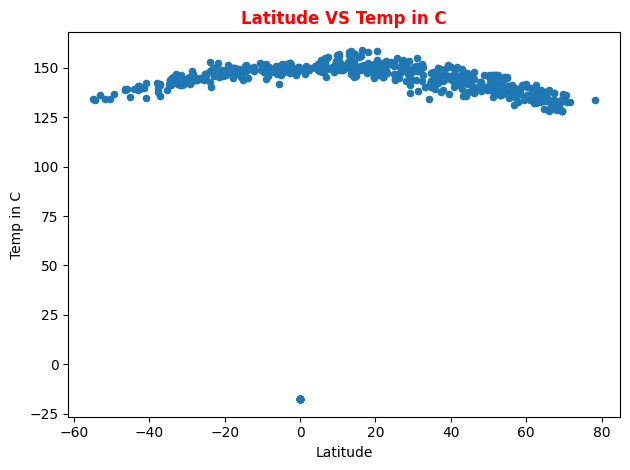

In [33]:
# Visalize the new df in a scatter plot

import matplotlib.pyplot as plt

lat_temp_df = df[['Latitude','Temp in C']]
lat_temp_df.plot(kind='scatter',x='Latitude',y='Temp in C')
plt.title('Latitude VS Temp in C',fontweight = 'bold',c='r')
plt.tight_layout()
plt.show()


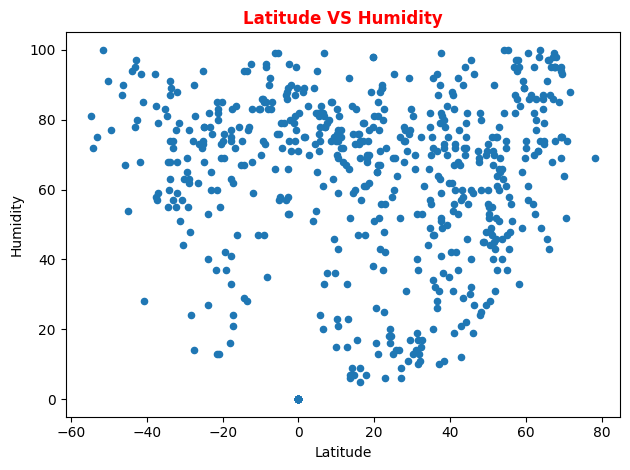

In [34]:
# Use different columsn for the visualization

lat_hum_df = df[['Latitude','Humidity']]
lat_hum_df.plot(kind='scatter',x='Latitude',y='Humidity')
plt.title('Latitude VS Humidity',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

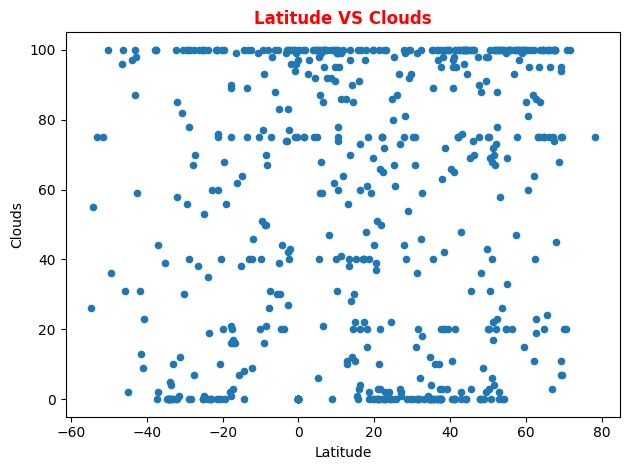

In [35]:
# Use different columsn for the visualization

lat_cloud_df = df[['Latitude','Clouds']]
lat_cloud_df.plot(kind='scatter',x='Latitude',y='Clouds')
plt.title('Latitude VS Clouds',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

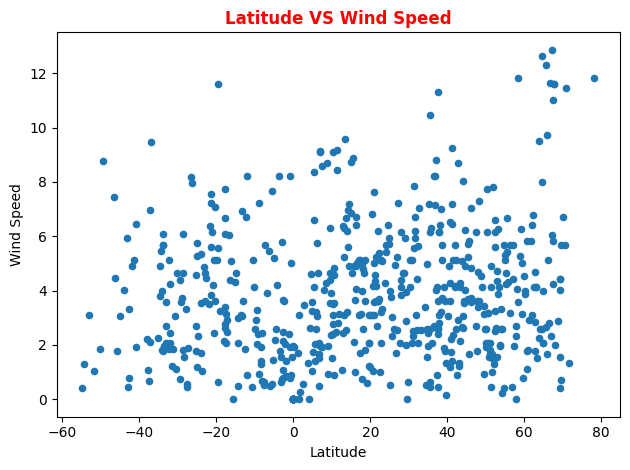

In [36]:
# Use different columsn for the visualization

lat_wind_df = df[['Latitude','Wind Speed']]
lat_wind_df.plot(kind='scatter',x='Latitude',y='Wind Speed')
plt.title('Latitude VS Wind Speed',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

In [45]:
# Loacte all data with a positive Latitude only

NH_df = df.loc[(df['Latitude']>0)&(df['Longitute']>0)]
NH_df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds,Temp in C
city,,,,,,,
vadso,70.0744,29.7487,275.64,64,6.69,20,135.355556
pirallahi,40.4723,50.3330,292.23,62,4.91,11,144.572222
i-n-salah,27.1935,2.4607,308.77,9,7.22,1,153.761111
nemuro,43.3236,145.5750,276.40,90,4.13,100,135.777778
bununu,9.8681,9.6628,313.54,15,2.38,40,156.411111


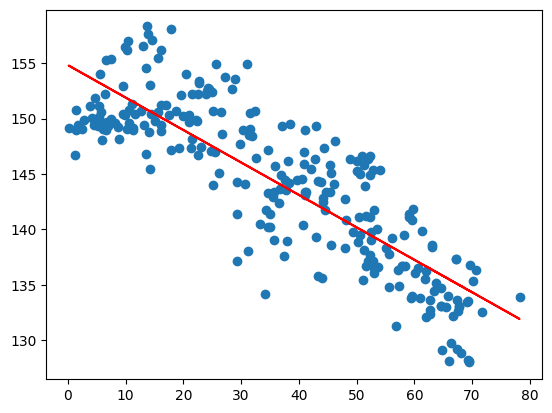

In [46]:
# Def a funtcion that can plot Scatter and Linear Regrassion graph by giving the x and y info columns

from scipy.stats import linregress

def lin_reg(x,y):


    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    y_pred = slope*x + intercept

    plt.scatter(x,y)
    plt.plot(x,y_pred,c='r')
    return plt.show()

lin_reg(NH_df['Latitude'],NH_df['Temp in C'])
